In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tree_with_known_smoothness import DOO, StoOO, HOO
from utils import visualize

In [2]:
def gaussian_noise(func, std=0.02):
    def noisy_func(x):
        return func(x) + np.random.normal(0, std)
    return noisy_func

def bernoulli_noise(func):
    def noisy_func(x):
        return np.random.binomial(1, func(x))
    return noisy_func

def func(x):
    return 0.5 * (np.sin(13 * x) * np.sin(27 * x) + 1)


# Section 3: Optimistic optimization with known smoothness

## Deterministic Optimistic Optimization (DOO)

100%|██████████| 150/150 [00:00<00:00, 732.31it/s]


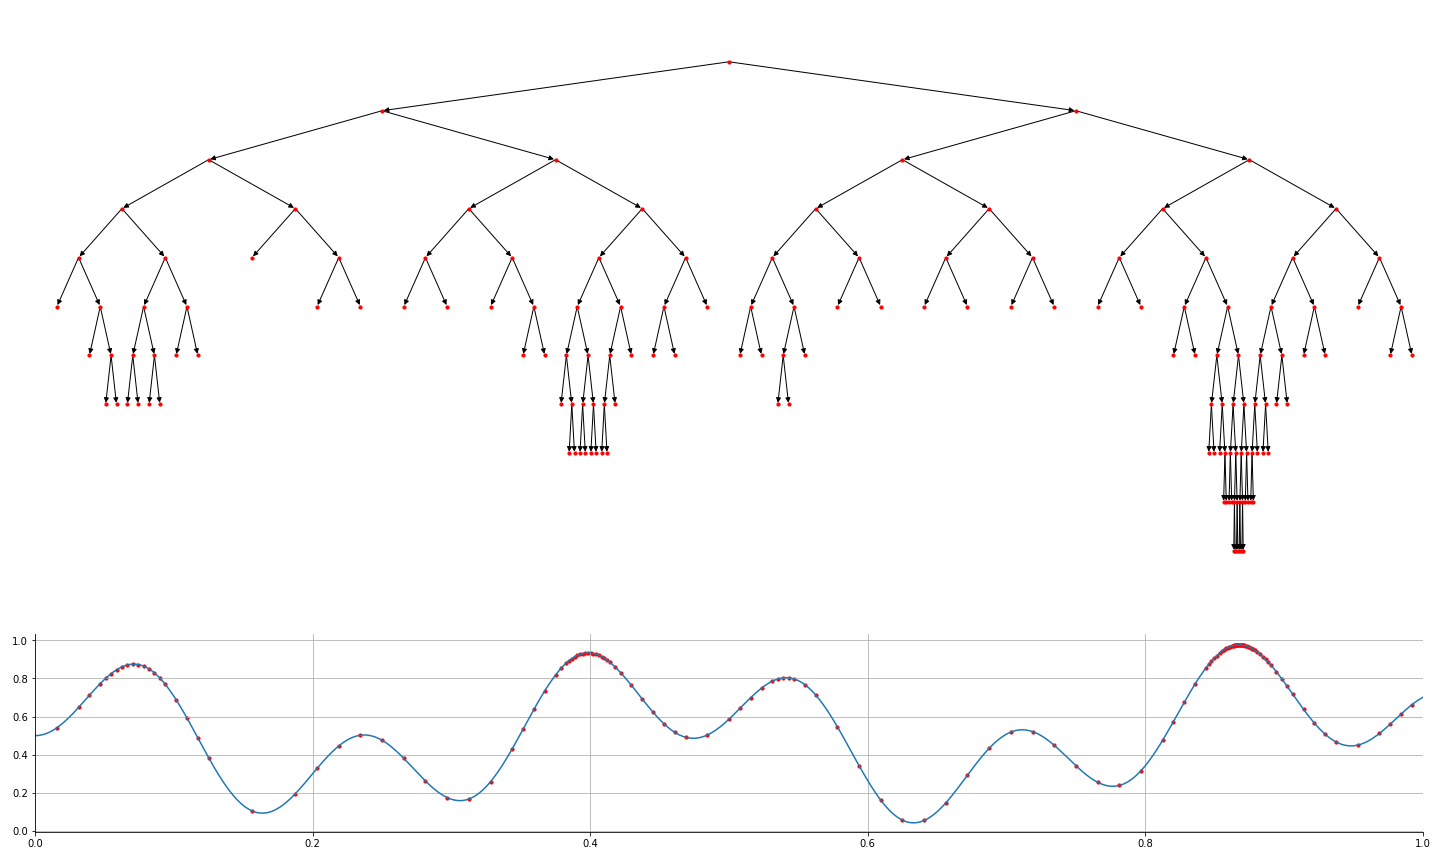

In [3]:
tree = DOO(150, 2, lambda node: 14 * 2 ** (-1 * node.depth))

result = tree.search(func)
graph = visualize(tree, func)

## Stochastic Optimistic Optimization (StoOO)

100%|██████████| 2000/2000 [00:03<00:00, 501.58it/s]


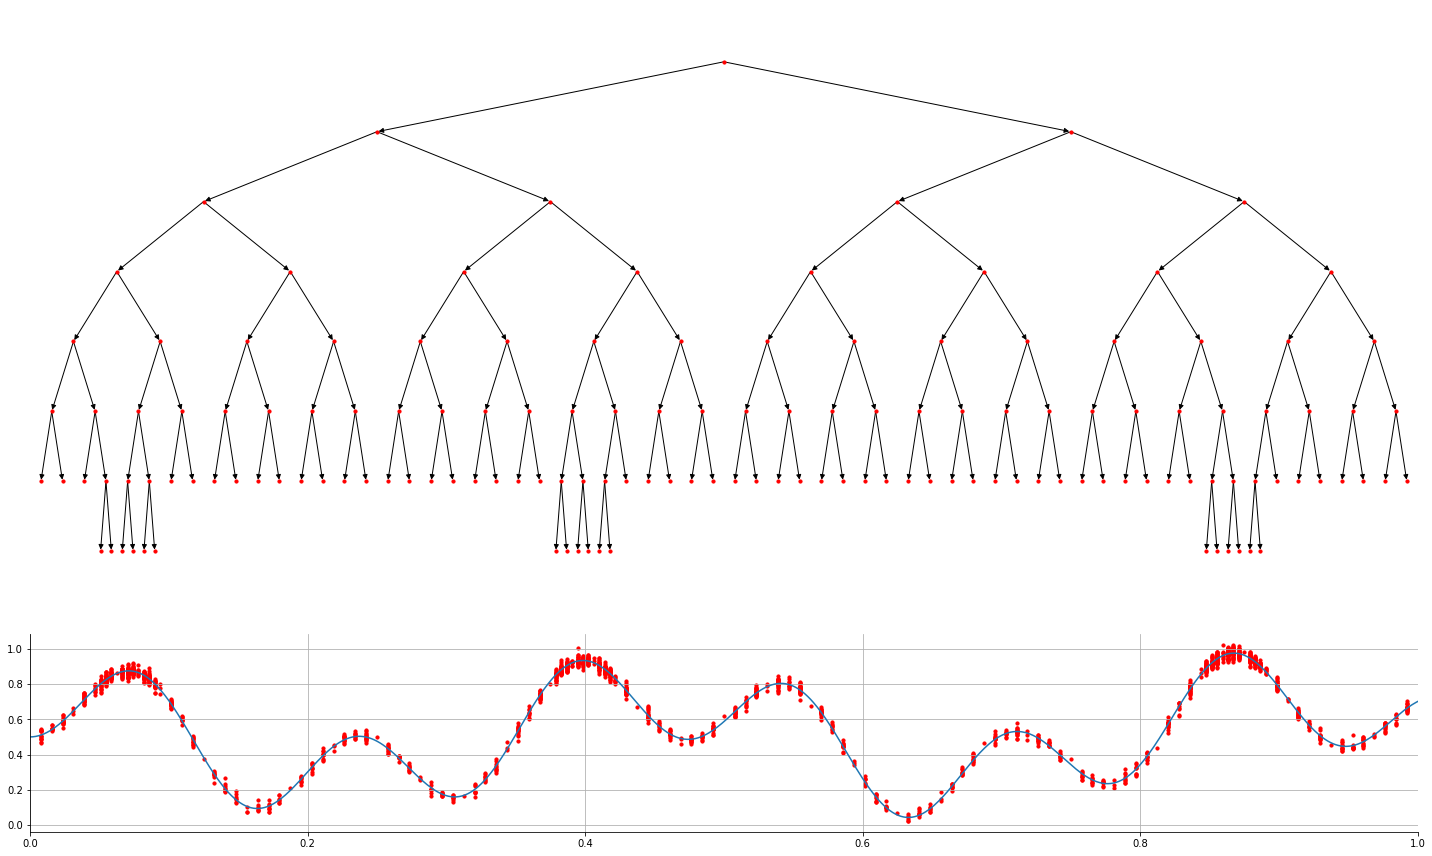

In [4]:
tree = StoOO(2000, 2, lambda node: 14 * 2**(-1 * node.depth), 0.01)

result = tree.search(gaussian_noise(func))
graph = visualize(tree, func)

## Hierarchical Optimistic Optimization (HOO)

100%|██████████| 500/500 [00:01<00:00, 368.75it/s]


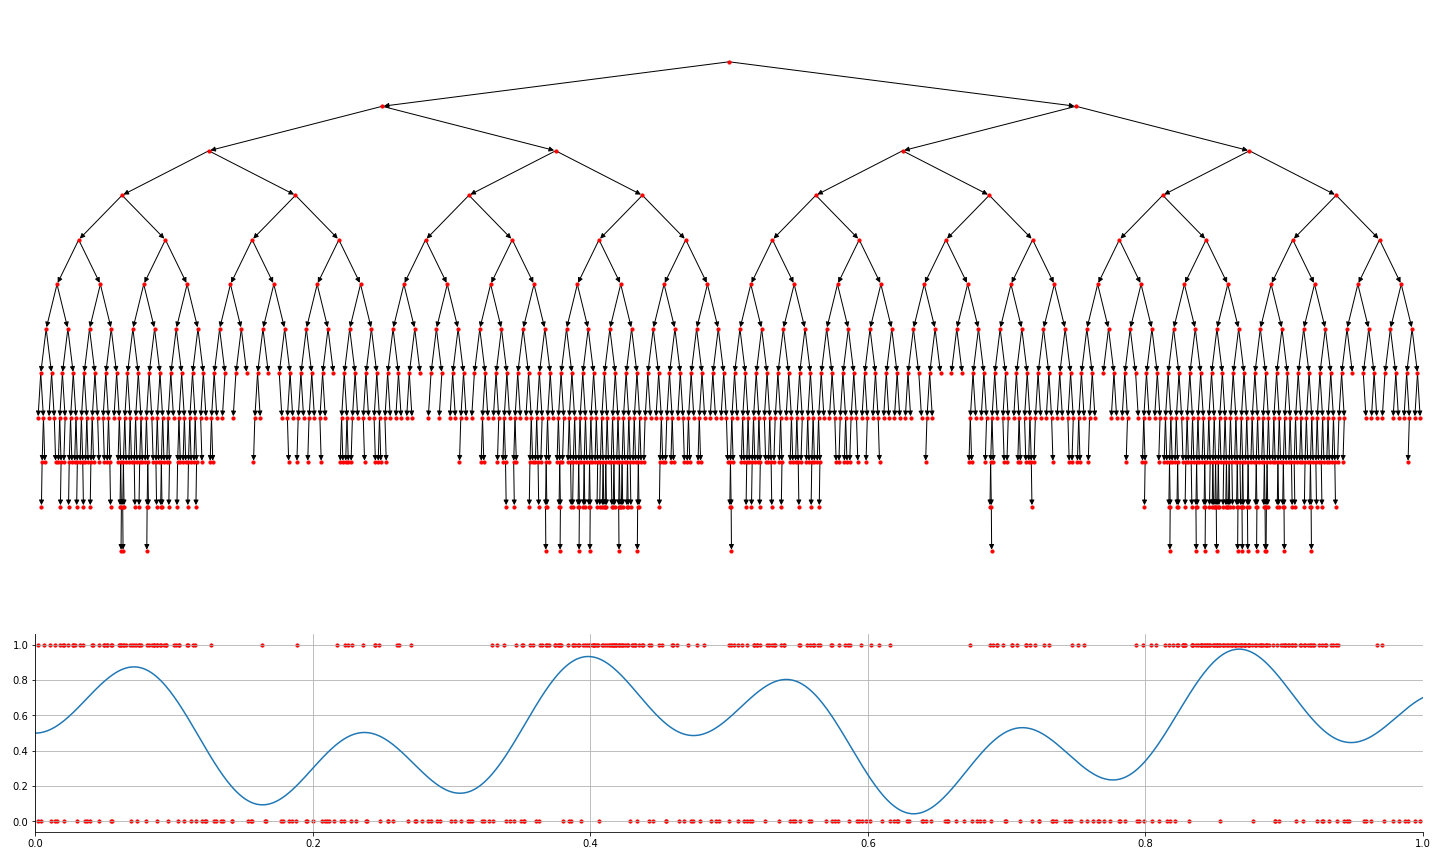

In [5]:
tree = HOO(500, 2, lambda node: 14 * 2**(-1 * node.depth), 0.01)

result = tree.search(bernoulli_noise(func))
graph = visualize(tree, func)

# Section 4: Simultaneous Optimistic Optimization

## Simultaneous Optimistic Optimization (SOO)

## Stochastic Simultaneous Optimistic Optimization (StoSOO)

# Section 5: Optimistic planning

## Optimistic Planning algorithm (OPD)

## Open Loop Optimistic Planning (OLOP)

## Optimistic planning in MDP (OP-MDP)